# Explore here

EDA 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# modelado
from sklearn.model_selection import train_test_split

# escalado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge



In [2]:
archivo= ('https://breathecode.herokuapp.com/asset/internal-link?id=929&path=medical_insurance_cost.csv')

df = pd.read_csv(archivo)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()
df.shape
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(num_duplicados)

print ("La base de datos tiene 1338 filas y 7 columnas, tiene 2 variables float, 2 numericas y 3 categoricas.No existen valores nulos y no hay duplicados.")
print(" las variables categoricas, las tres son nominale")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
1
La base de datos tiene 1338 filas y 7 columnas, tiene 2 variables float, 2 numericas y 3 categoricas.No existen valores nulos y no hay duplicados.
 las variables categoricas, las tres son nominale


In [4]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


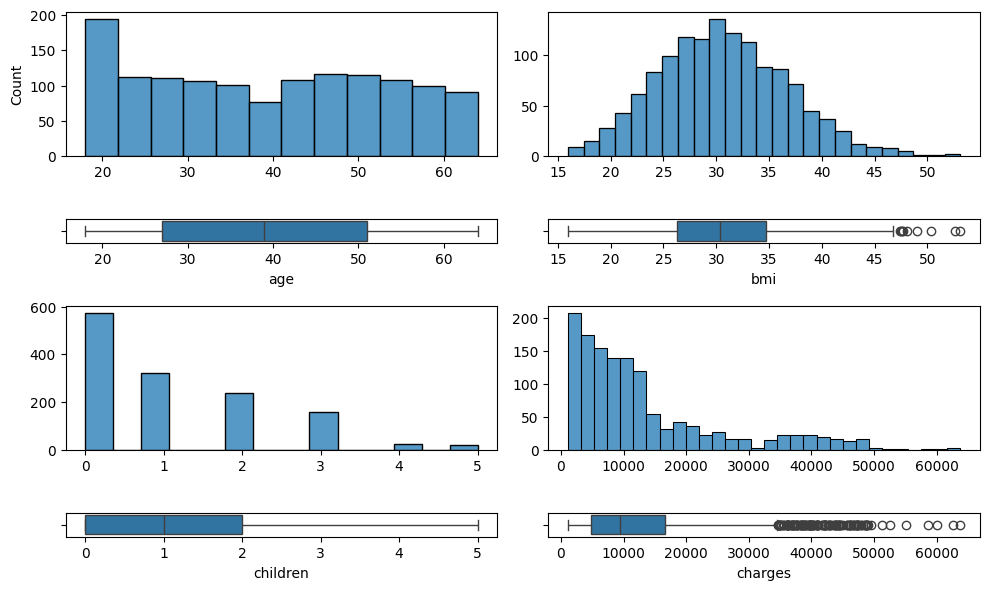

age
18    69
19    68
46    29
52    29
50    29
47    29
48    29
51    29
45    29
20    29
24    28
27    28
28    28
25    28
23    28
49    28
54    28
53    28
22    28
21    28
26    28
31    27
41    27
44    27
43    27
42    27
29    27
30    27
40    27
32    26
33    26
57    26
34    26
55    26
56    26
35    25
58    25
37    25
59    25
39    25
36    25
38    25
62    23
60    23
63    23
61    23
64    22
Name: count, dtype: int64
bmi
32.300    13
28.310     9
31.350     8
28.880     8
30.875     8
          ..
21.500     1
39.710     1
32.870     1
44.700     1
30.970     1
Name: count, Length: 548, dtype: int64
charges
1639.56310     2
2221.56445     1
19798.05455    1
13063.88300    1
13555.00490    1
              ..
1149.39590     1
37079.37200    1
4738.26820     1
2897.32350     1
4762.32900     1
Name: count, Length: 1337, dtype: int64
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
Se observa que hay un 40% de datos 0 

In [5]:
#ANALISIS UNIVARIABLE NUMERICA

fig, axes = plt.subplots(4, 2, figsize = (10, 6), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

#  Histogramas y diagramas de caja de Variables numericas

sns.histplot(ax = axes[0, 0], data = df, x = "age").set(xlabel = None)
sns.boxplot(ax = axes[1, 0], data = df, x = "age")

sns.histplot(ax = axes[0, 1], data = df, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axes[1, 1], data = df, x = "bmi")

sns.histplot(ax = axes[2, 0], data = df, x = "children").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axes[3, 0], data = df, x = "children")

sns.histplot(ax = axes[2, 1], data = df, x = "charges").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axes[3, 1], data = df, x = "charges")


plt.tight_layout()
plt.show()

#Ver valores de cada variable
print(f"{df.age.value_counts()}")
print(f"{df.bmi.value_counts()}")
print(f"{df.charges.value_counts()}")
print(f"{df.children.value_counts()}")
print("Se observa que hay un 40% de datos 0 en la variable Children, lo que puede significar que no existen niños como dependientes mas que un error o falta de info.")

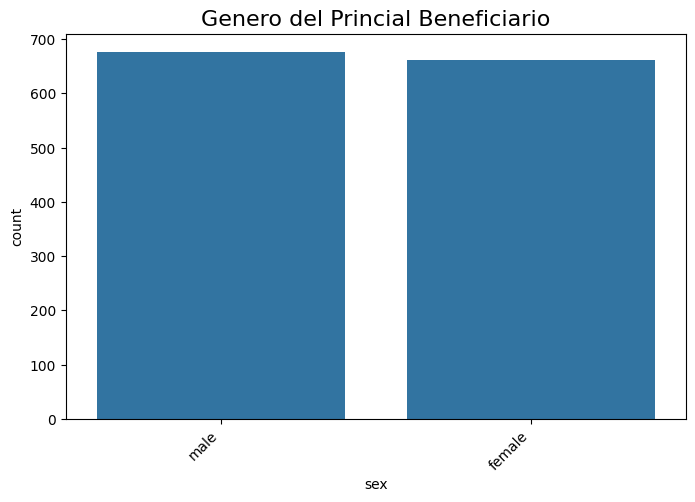

Se observa una proporcion igual de beneficairios tanto hombres como mujeres


sex
male      676
female    662
Name: count, dtype: int64

In [6]:
#ANALISIS UNIVARIABLES CATEGORICA

plt.figure(figsize=(8, 5)) 
sns.countplot(data=df, x='sex', order=df['sex'].value_counts().index)
plt.xticks(rotation=45, ha='right', fontsize=10) 

plt.title('Genero del Princial Beneficiario', fontsize=16)
plt.show()
print("Se observa una proporcion igual de beneficairios tanto hombres como mujeres")

df.sex.value_counts()

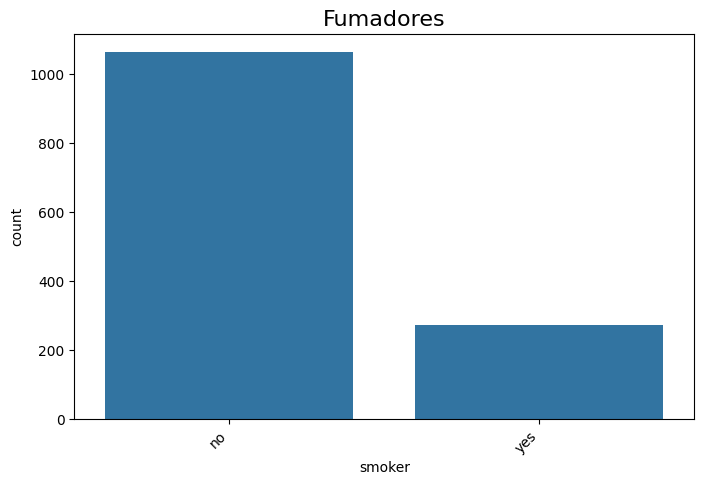

El 80% no son fumadores


smoker
no     1064
yes     274
Name: count, dtype: int64

In [7]:
plt.figure(figsize=(8, 5)) 
sns.countplot(data=df, x='smoker', order=df['smoker'].value_counts().index)
plt.xticks(rotation=45, ha='right', fontsize=10) 

plt.title('Fumadores', fontsize=16)
plt.show()
print("El 80% no son fumadores")

df.smoker.value_counts()

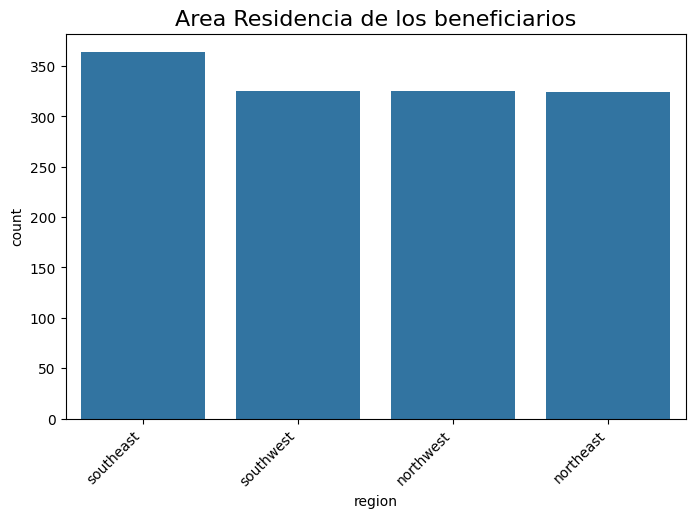

Existe una proporcion igial en las regiones donde viven los beneficiarios


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [8]:
plt.figure(figsize=(8, 5)) 
sns.countplot(data=df, x='region', order=df['region'].value_counts().index)
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.title('Area Residencia de los beneficiarios', fontsize=16)
plt.show()
print("Existe una proporcion igial en las regiones donde viven los beneficiarios")

df.region.value_counts()

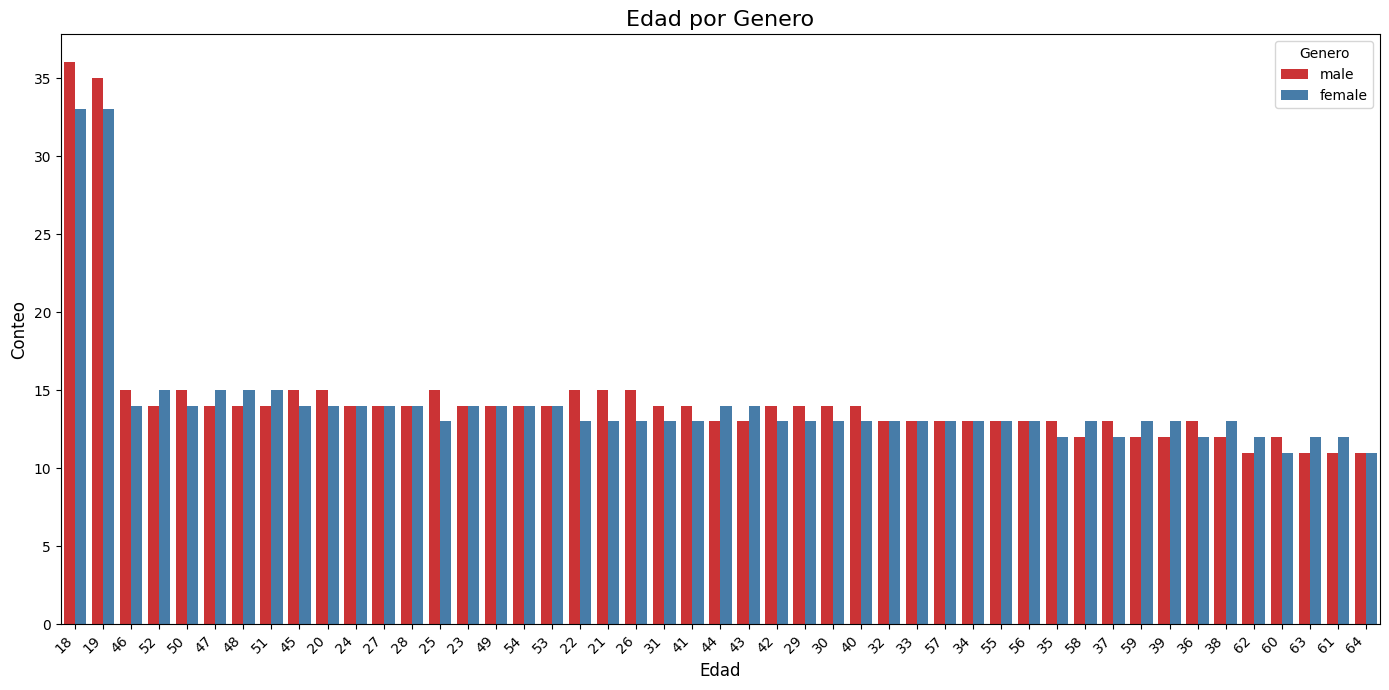

Existe una proporcion igial de edad y genero. Las edades con mayor frecuencia son 18 y 19 años


In [9]:
#ANALISIS MULTIVARIANTE

# Genero y Edad

plt.figure(figsize=(14, 7)) 

sns.countplot(data=df, x='age', hue='sex',palette='Set1', order=df['age'].value_counts().index ) 
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.title('Edad por Genero', fontsize=16)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Conteo', fontsize=12)
plt.legend(title='Genero') 
plt.tight_layout()
plt.show()

print("Existe una proporcion igial de edad y genero. Las edades con mayor frecuencia son 18 y 19 años")


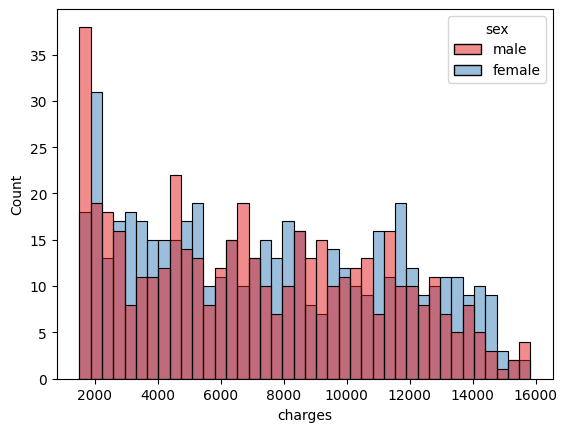

sex
male      676
female    662
Name: count, dtype: int64

In [10]:
# Genero y Charges

sns.histplot(data=df[(df["charges"] >= 1500) & (df["charges"] <= 16000)], 
             x="charges", 
             hue='sex', 
             palette='Set1', 
             bins=40) # Define el número de barras o el ancho de cada una
plt.show()

df.sex.value_counts()



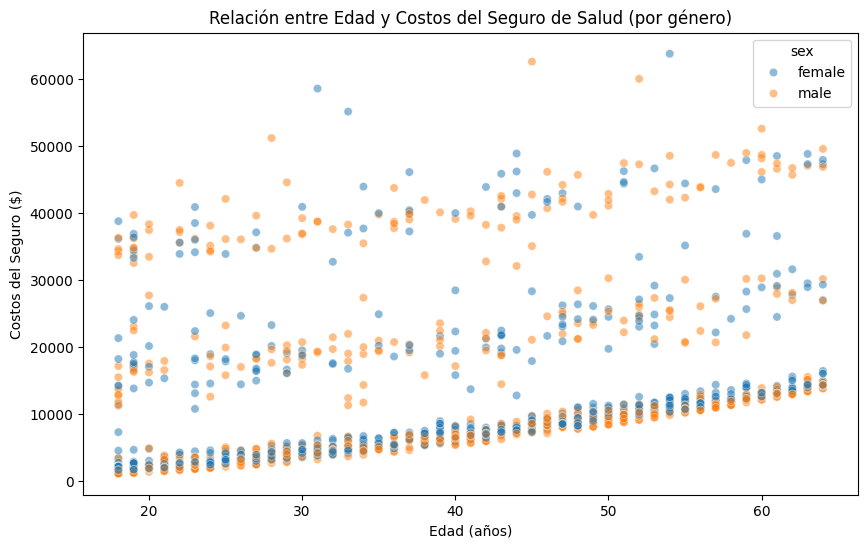

In [11]:
# Edad , Charges y Genero 

plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='age', y='charges', alpha=0.5, hue='sex') 
plt.title('Relación entre Edad y Costos del Seguro de Salud (por género)')
plt.xlabel('Edad (años)')
plt.ylabel('Costos del Seguro ($)')
plt.show()


In [12]:
# ELIMINACION DE OUTLIERS

#bmi
# Filtrar valores de BMI (18 a 40)
bmi_so = (df['bmi'] >= 18) & (df['bmi'] <= 40)

#Charges
# Filtrar valores de charges (1121 a 35000)
charges_so = (df['charges'] >= 1121) & (df['charges'] <= 35000)

# Aplicar ambos filtros al dataframe
df_filtrado = df[bmi_so & charges_so]


df_filtrado.shape

(1120, 7)

Se establecen los limites de bmi y Charges para eliminar los outliers de acuerdo a la observacion de la tabla de estadistica descriptiva
Se crea un dataframe adicional con las variables sin outliers.
Finalmente no se considera usar el df con limites de los outliers porque afecta al resultado del modelo de regresion elegido

In [13]:
#FACTORIZACION DE VARIABLES CATEGORICAS

df["genero"] = pd.factorize(df["sex"])[0]
df["fumador"] = pd.factorize(df["smoker"])[0]
df["regionf"] = pd.factorize(df["region"])[0]

print("se factoriza las variables categoricas con el fin de hacer mapa de calor y ver relacion entre ellas")

df.head()


se factoriza las variables categoricas con el fin de hacer mapa de calor y ver relacion entre ellas


,age,sex,bmi,children,smoker,region,charges,genero,fumador,regionf
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2


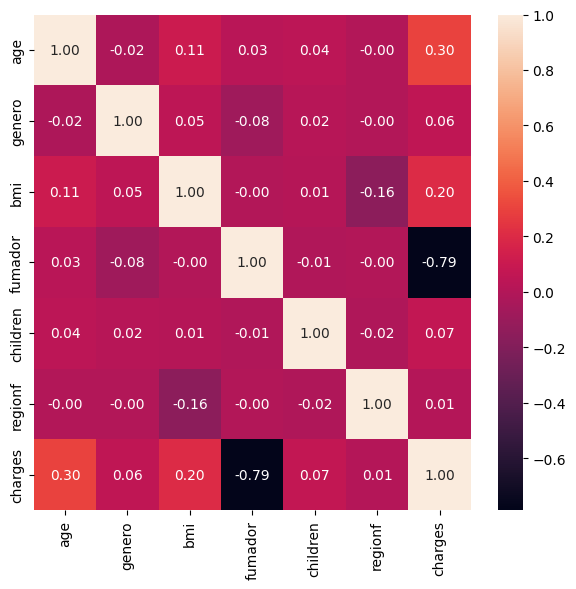

In [14]:
# MAPA DE CALOR

fig, axes = plt.subplots(figsize = (6, 6))

#sns.heatmap(df_filtrado[["age", "genero", "bmi", "fumador", "children", "regionf", "charges"]].corr(), annot = True, fmt = ".2f")
sns.heatmap(df[["age", "genero", "bmi", "fumador", "children", "regionf", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

#print ("El mapa de calor muestra una correlacion entre Ser fumador y el valor de la prima")

In [15]:
# Prueba ANOVA para variable categorica nominal como independiente y charge como dependiente

#H0= No existe relacion entre el sexo y la prima del seguro 
#H1= Existe relacion entre el sexo y la prima del seguro

# Separar los grupos para scipy.stats
grupo_a= df_filtrado[df_filtrado['sex'] == 'female']['charges']
grupo_b = df_filtrado[df_filtrado['sex'] == 'male']['charges']

f_statistic, p_value = stats.f_oneway(grupo_a, grupo_b)

print("--- Usando scipy.stats ---")
print(f"Estadístico F: {f_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(f"\nComo el valor p ({p_value:.4f}) es menor que {alpha}, rechazamos la hipótesis nula.")
    print("Existe una diferencia estadísticamente significativa entre las medias de los valores.\nel La prima depende de la edad")
else:
    print(f"\nComo el valor p ({p_value:.4f}) es mayor que {alpha}, no rechazamos la hipótesis nula.")
    print("No hay relacion entre las variables")

--- Usando scipy.stats ---
Estadístico F: 0.0083
Valor p: 0.9273

Como el valor p (0.9273) es mayor que 0.05, no rechazamos la hipótesis nula.
No hay relacion entre las variables


In [16]:
# Prueba ANOVA para variable categorica nominal como independiente y charge como dependiente

#H0= No existe relacion entre ser fumador y la prima del seguro 
#H1= Existe relacion entre ser fumador y la prima del seguro

# Separar los grupos para scipy.stats
grupo_a= df_filtrado[df_filtrado['smoker'] == 'yes']['charges']
grupo_b = df_filtrado[df_filtrado['smoker'] == 'no']['charges']

f_statistic, p_value = stats.f_oneway(grupo_a, grupo_b)

print("--- Usando scipy.stats ---")
print(f"Estadístico F: {f_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(f"\nComo el valor p ({p_value:.4f}) es menor que {alpha}, rechazamos la hipótesis nula.")
    print("Existe una diferencia estadísticamente significativa entre las medias de los valores.\nel La prima depende de ser o no fumador")
else:
    print(f"\nComo el valor p ({p_value:.4f}) es mayor que {alpha}, no rechazamos la hipótesis nula.")
    print("No hay relacion entre las variables")

--- Usando scipy.stats ---
Estadístico F: 721.8677
Valor p: 0.0000

Como el valor p (0.0000) es menor que 0.05, rechazamos la hipótesis nula.
Existe una diferencia estadísticamente significativa entre las medias de los valores.
el La prima depende de ser o no fumador


In [17]:
print ("Se selecciona a la columna Charges como variable dependiente")

Se selecciona a la columna Charges como variable dependiente


SPLIT Y ENTRENAMIENTO DE DATOS

In [18]:
#Se decide sobre el DF original con outliers y sin variables relevantes
df.drop(["genero", "fumador", "regionf"], axis = 1, inplace = True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [379]:
#Se divide los datos de entrenamiento
X = df.drop("charges", axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,age,sex,bmi,children,smoker,region
560,46,female,19.95,2,no,northwest
1285,47,female,24.32,0,no,northeast
1142,52,female,24.86,0,no,southeast
969,39,female,34.32,5,no,southeast
486,54,female,21.47,3,no,northwest


In [380]:
#ESCALADO 

variables_numericas = ['age','bmi', 'children']

# instancio el escalador
scaler = StandardScaler()

# entreno el escalador con los datos de entrenamiento
scaler.fit(X_train[variables_numericas])

# aplico el escalador en train y test
X_train_num_scal = scaler.transform(X_train[variables_numericas])
X_train_num_scal = pd.DataFrame(X_train_num_scal, index = X_train.index, columns = variables_numericas)

X_test_num_scal = scaler.transform(X_test[variables_numericas])
X_test_num_scal = pd.DataFrame(X_test_num_scal, index = X_test.index, columns = variables_numericas)

X_train_num_scal.head()

,age,bmi,children
560,0.472227,-1.756525,0.734336
1285,0.543313,-1.033082,-0.911192
1142,0.898745,-0.943687,-0.911192
969,-0.025379,0.622393,3.202629
486,1.040918,-1.504893,1.557100


In [381]:
#CODIFICACION VARIABLES CATEGORICAS NOMINAL - ONE HOT ENCODING

variables_nominales= ['sex', 'smoker','region']

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_nom_ohe = ohe.fit_transform(X_train[variables_nominales])
X_test_nom_ohe = ohe.transform(X_test[variables_nominales]) 

#Se recupera el dataframe porque estaba en formato numpy

nombres_columnas_ohe = ohe.get_feature_names_out(variables_nominales)

#Reconstruir X_train
X_train_ohe_df = pd.DataFrame(X_train_nom_ohe,columns=nombres_columnas_ohe,index=X_train.index)

#Reconstruir X_test
X_test_ohe_df = pd.DataFrame(X_test_nom_ohe,columns=nombres_columnas_ohe,index=X_test.index)

X_train_ohe_df.head()


,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1285,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1142,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
969,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
486,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [382]:
#CONCATENACION FINAL 

X_train_final = pd.concat([X_train_num_scal, X_train_ohe_df], axis=1)
X_test_final = pd.concat([X_test_num_scal, X_test_ohe_df], axis=1)

# Eliminamos posibles valores faltantes (por seguridad)
X_train_final = X_train_final.fillna(0)
X_test_final = X_test_final.fillna(0)


# Confirmación
print("Columnas finales:", X_train_final.shape[1])
print("Coincidencia de filas:", X_train_final.shape[0] == y_train.shape[0])

Columnas finales: 11
Coincidencia de filas: True


In [383]:
#INICIALIZACION Y ENTRENAMIENTO

# instanciamos el modelo con valores por defecto
model = LinearRegression()

# entrenamos
model.fit(X_train_final, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [384]:
print(f"Intercepto (b0): {model.intercept_}")
print(f"Coeficientes (b1): {model.coef_}")

Intercepto (b0): 20311.928139319254
Coeficientes (b1): [ 3.61497541e+03  2.03622812e+03  5.16890247e+02  9.29584582e+00
 -9.29584582e+00 -1.18255644e+04  1.18255644e+04  4.59585244e+02
  8.89079180e+01 -1.98279052e+02 -3.50214110e+02]


In [385]:
#PREDICCION DEL MODELO

y_pred = model.predict(X_test_final)
y_pred

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084136, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673493, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303302, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      

In [390]:
# metricas
mse_rl = mean_squared_error(y_test, y_pred)
rmse_rl = np.sqrt(mse_rl)
r2_rl = r2_score(y_test, y_pred)


In [391]:
#Evaluacion del Modelo 

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Coeficiente de determinación: {r2_rl}")

Error cuadrático medio: 33608414.732896596
RMSE: 5797.276492707295
Coeficiente de determinación: 0.7835189092370942


In [392]:
#REGULACION LASSO

# modelo
reg_lasso = Lasso(alpha = 0.2, max_iter = 5000)

# entrenamiento
reg_lasso.fit(X_train_final, y_train)

# prediccion
y_pred = reg_lasso.predict(X_test_final)
y_pred

# metricas
mse_l1 = mean_squared_error(y_test, y_pred)
rmse_l1 = np.sqrt(mse_l1)
r2_l1 = r2_score(y_test, y_pred)

print("MSE: ", mse_l1)
print("RMSE: ", rmse_l1)
print("Coeficiente de determinación: ", r2_l1)

MSE:  33597479.03604886
RMSE:  5796.333240596926
Coeficiente de determinación:  0.7835893490838013


In [393]:
#REGULACION RIDGE

# modelo
reg_ridge = Ridge(alpha = 0.5, max_iter = 4000)

# entrenamiento
reg_ridge.fit(X_train_final, y_train)

# prediccion
y_pred = reg_ridge.predict(X_test_final)
y_pred

# metricas
mse_l2 = mean_squared_error(y_test, y_pred)
rmse_l2 = np.sqrt(mse_l2)
r2_l2 = r2_score(y_test, y_pred)

print("MSE: ", mse_l2)
print("RMSE: ", rmse_l2)
print("Coeficiente de determinación: ", r2_l2)

MSE:  33608414.732896596
RMSE:  5797.276492707295
Coeficiente de determinación:  0.7835189092370942


In [394]:
#RESULTADO

data = {
    'Modelo': ['Regresión lineal', "Regulación Lasso", "Regulación Ridge"],
    'MSE': [mse_rl, mse_l1, mse_l2],
    'RMSE': [rmse_rl, rmse_l1, rmse_l2],
    'R²': [{r2_score(y_test, y_pred)}, r2_l1, r2_l2]
}

# Crear el DataFrame
resultados = pd.DataFrame(data)

# Mostrar el DataFrame
print(resultados)

             Modelo           MSE         RMSE                    R²
0  Regresión lineal  3.360841e+07  5797.276493  {0.7835189092370942}
1  Regulación Lasso  3.359748e+07  5796.333241              0.783589
2  Regulación Ridge  3.360841e+07  5797.276493              0.783519


In [359]:
coef_df = pd.DataFrame({
    'Variable': X_train_final.columns,
    'Coeficiente': reg_lasso.coef_
}).sort_values(by='Coeficiente', ascending=False)

print(coef_df)

     Variable   Coeficiente
0         age  3.616149e+03
1         bmi  1.978292e+03
2    children  5.190967e+02
3  sex_female  7.077559e+00
6  smoker_yes  1.150602e-11
4    sex_male -2.364382e-13
5   smoker_no -2.365259e+04


## CONCLUSIONES

El modelo de regresion explica una relacion del costo de la prima de seguro de salud con varias variables independientes en un 78.35%
El 21% restante se debe a factores externos no analizados en la base de datos
 por cada año de edad, el costo de la prima aumenta 3.616, por cada punto de bmi que aumente, el costo de la prima sube 1.978
Ser mujer aumenta el costo de la prima y ser fumador tambien